In [1]:
import pandas as pd
import numpy as np 
# importing some of the needed libraries to perform our tasks.
#


In [2]:
#loading the datasets by using pandas read_csv function.
movies = pd.read_csv('/Users/tarakram/Documents/Movie_recommendation/Data/tmdb_5000_movies.csv')
credits = pd.read_csv('/Users/tarakram/Documents/Movie_recommendation/Data/tmdb_5000_credits.csv')

In [3]:
movies.head(3) # Display top 3 rows


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


+ Budget --> the budget of the movie which in dollars
+ Genres --> the Genre of the movie, like Action, thriller etc.
+ Homepage --> the website of that particular movie.
+ Id --> movies id in the tmbd wensite
+ Keywords --> keywords for that particular movie.
+ original_language --> the language of the movie(original), like hindi, marati etc.
+ original title --> the title of the movie in their language, like dilwale, etc.
+ Overview --> introduction about the movie, small story line.
+ popularity --> Popularity based on the ratings that are given by the people.
+ production_companies --> the companies that are involed in the movie production.
+ production_countries --> the countries that are involed in the movie production.
+ release_date --> movie release date.
+ revenue --> totel revenue of particular movie.
+ runtime --> runtime of the movie, like 2:40min etc.
+ spoken_languages --> languages that are there in the movie.
+ status --> status of the movie, either it is realesed or not.
+ tagline --> the taglines of the movie.
+ title --> the title of the movie, which is all around the world.
+ Vote_average --> average rating of the movie in tmbd
+ vote_count --> number of people, who given vote to particular movie.

From the above Dataset we can so many columns like - **'budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'**
+ Every column is not useful for our recommendation, so we have to remove them.
     

In [4]:
movies.shape # shape of the movies

(4803, 20)

In [5]:
credits.head(3) # Display top 3 rows.

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


+ Movie_id --> Id of the particular movie
+ title --> the name of the movie, which is gloabally.
+ cast --> it shows who are actors, their names, charactors etc.
+ crew --> it shoes the director, production, camera team, etc.

In [6]:
credits.shape # shape of the credits.

(4803, 4)

In [7]:
# lets see deep into the Cast
credits['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [8]:
# here we can see, the character, credit_id, gender, name, order, and lot more.

In [9]:
# lets see deep into the Crew
credits['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [10]:
#. here we can see, credit_id, department, gender, director, editor, and lot more.

The problem is we have two datasets, so we have to **merge** them into one, to get our job easy.

In [11]:
# we can merge movie_id, or Title, here I am merging on the movie title. 
data = movies.merge(credits,on='title') # we are merging the credits datset on the movies datset, on the title column.
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
data.shape

(4809, 23)

In [13]:
# now we have merged these two dataframes and stored into Data, having shape of 4809 rows × 23 columns

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

#### Data Cleaning
If we clearly observe there are lot of columns that are not neccesary fot our requirement, so we can remove them, but wait what are they? 
+ Budget - The budget doesn't add value to the movie story, if the movie is good, people will watch it, so if the budget is high it doesn't mean that the movie should be good, so we can remove it.
+ homepage - the homepage doesn't add any sort of value to recommendation, so we can remove it.
+ id - we are havig movie_id, both are same, so I am going with the movie_id, so we can remove it.
+ Original_language - if we see the value_counts, most of the movies are in english, and it is imbalanced data, so we can reomve it.
+ Original_title - every language had its own title, also we have a global title column, so we can remove it.
+ popularity - popularity is an important section, but here in this project we are mainly recommending based on the content( we can use this in popularity_based_recommendation), so we can remove it
+ production_companies - the production companies also didn't add any value, because the movie mainly depends on the story, tagline, actors etc, not on who is producing the movie, so we can remove it.
+ production_countries - same goes with the production_countires, so we can remove it.
+ release_date - the release date add some value, but here it is in numeric, so we can consider it as a least important, so we can remove it.
+ Revenue - the revenue depends on the movie, if it is good, it collects more, but it can lead to misleading also, if srk in the movie, and if the movie is not good also the revenue will be high, so we can remove it.
+ run_time - we can remove run-time, because it doesn't mean that having 3hour movie is good, others are bad, so it doesn't add any value to the movie story.
+ spoken_languages - the languages that are there in movies, now all the movies are realeased in diiferent languages, so it is not about the language, it is all about the movie, story line, etc, so we can remove it.
+ status - if we see the dataset, almost all the movies are released,and we can say the movie is good or not, if it is not released, so we can remove it.
+ vote_average - it is imporatant in populaority based recommendation, but here in the content_based it is not that much important, so we can remove it.


In [15]:
# Sp, the remaining columns are --> movie_id, gernres, keywords, title, cast, and crew

In [16]:
movies = data[['movie_id', 'title','overview','genres','keywords','cast','crew']]

In [17]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [18]:
# this is the dataset that we are working

In [19]:
movies.isnull().sum() # checking for null values 

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [20]:
movies = movies.dropna() # removing the null values

In [21]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [22]:
movies.duplicated().sum()

0

In [23]:
# Hurray!, there are no null values.


#### Pre Processing

In [24]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [25]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [26]:
movies.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [27]:
movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

##### AIM 
The Genres, keywords, cast and crew columns are having wreid format, which is not nice, so we have to remove them.
+ In Genres - I want only the names, like Action, adventure, thriller, etc.
+ In keywords - I want only the names, culture clash, ocen, spy etc.
+ in Cast - I want to pick first three actors names
+ in Crew - I want to pick the director and music director names.

In [28]:
import ast

In [29]:
# we are defining a function that return a list of names in that dict. of genre column.
def convert(obj):
    y = []
    for i in ast.literal_eval(obj):
        y.append(i['name'])
    return y

In [30]:
movies['genres'] = movies['genres'].apply(convert) # we are applying convert functin to our column.

In [31]:
movies.head(2) # display first 2 rows.

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [32]:
# we are doing same for the keywords column.
movies['keywords'] = movies['keywords'].apply(convert) # we are applying convert function to our column.

In [33]:
movies.head(2) # Display first 2 rows.

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [34]:
# for cast we want to have only first three names, not every nanmes in the dict.

In [35]:
# we are defining a function that takes a dictionary and returns first there names
def convert(obj):
    y = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            
            y.append(i['name'])
            counter +=1
        else:
            break
    return y

In [36]:
movies['cast'] = movies['cast'].apply(convert) # we are applying the convert function to teh keywords.

In [37]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [38]:
# in the crew column, we want the director name and music director name.

In [39]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [40]:
# we are defining function that takes dict. from crew and return thr director name and original music composer name.
def pick_mine(obj):
    y = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            y.append(i['name'])
        if i['job'] == 'Original Music Composer':
            y.append(i['name'])
    return y


In [41]:
movies['crew'] = movies['crew'].apply(pick_mine) # applying the convert function to the crew.

In [42]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[James Horner, James Cameron]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Gore Verbinski, Hans Zimmer]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Thomas Newman, Sam Mendes]"


In [43]:
# If we clearly observe, all most all the colums are in lists, so I want to convert the overview column in to list,because it is useful to concat.

In [44]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
# here we are applying the lambda function where it splits the string into list of words.

In [45]:
movies.head(3) # displaying first 3 rows

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[James Horner, James Cameron]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Gore Verbinski, Hans Zimmer]"
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Thomas Newman, Sam Mendes]"


Here there is a problem, we have to remove the space in between the words, because the recommender think like two words 
for ex - culture clash --> 'culturecash', but the recommender gonna takes this as two words, this can misleading and give wrong outputs. so we will remove that space.

In [46]:
# we are defining a function that takes a obj and remove spaces between them.
def replace(obj):
    y = []
    for i in obj:
        y.append(i.replace(" ",""))
    return y
        

In [47]:
movies['genres'] = movies['genres'].apply(replace)
movies['keywords'] = movies['keywords'].apply(replace)
movies['cast'] = movies['cast'].apply(replace)
movies['crew'] = movies['crew'].apply(replace) # we are applying replace function to four columns

In [48]:
movies.head(3) # display first 3 rows.

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[JamesHorner, JamesCameron]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[GoreVerbinski, HansZimmer]"
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[ThomasNewman, SamMendes]"


In [49]:
# now we Have to concat the columns into one column ie('Tags').

In [50]:
movies['tags'] = movies['overview'] + movies ['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [51]:
# now we have concatnated the 5 columns, so we can remove from our dataset.

In [52]:
movies.drop(['overview', 'genres', 'keywords','cast', 'crew'], axis = 1, inplace = True)

In [53]:
movies.head(3) # display first 3 rows

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."


In [54]:
# now our dataset is ready.

In [55]:
# we have concatnated the columns, so now we have to remove that list and convert it into list

In [56]:
movies['tags'] = movies['tags'].apply(lambda x:" ".join(x)) # this function concatnates the single string that is separated by space.

In [57]:
movies.head(3)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...


In [58]:
movies['tags'][0] # this is the whole tags column that includes everything.

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesHorner JamesCameron'

In [59]:
# now we are converting the tags into lower case 
movies['tags'] = movies['tags'].apply(lambda x:x.lower())

In [60]:
movies['tags'][0] # now, everything is in lower cases

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jameshorner jamescameron'

#### Vectorization

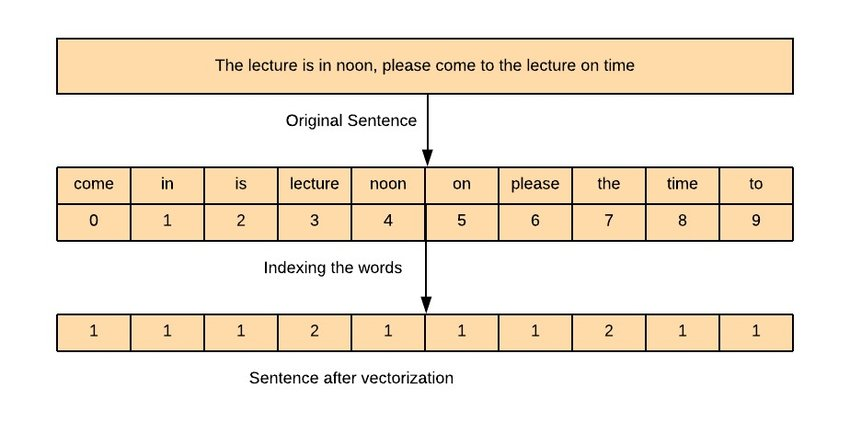

In the context of natural language processing (NLP), vectorization is used to convert text data into numerical vectors that can be used as input to machine learning models.<br>
Here for our problem we are using **count_Vectorizer**<br>
CountVectorizer is a technique for vectorizing text data that converts a collection of text documents into a matrix of token counts. Each row of the matrix represents a document, and each column represents a unique token (e.g., a word). The value in each cell represents the frequency of that token in that document.<br>
We want to convert the whole ( *tags*) column into vectorized format, which is suitable for the computation for machine learning model.<br>
Here we are taking **5000** words which are more frequent in our dataset


And we also using the Stopwords, so what are stop words?
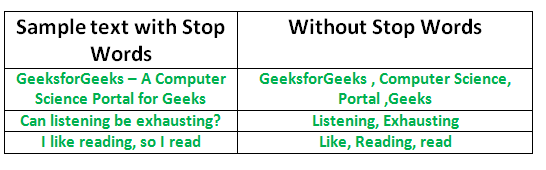
    

we are removing the stopwords, such as **a, an, the,** etc, which doesn't give any meaning.

In [61]:
# we are impoting the countvectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer


In [62]:
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [63]:
vectors = cv.fit_transform(movies['tags']).toarray()

In [64]:
vectors.shape

(4806, 5000)

In [65]:
feature_names = cv.get_feature_names_out()
for name in feature_names:
    print(name)

000
007
10
100
11
12
13
14
15
16
17
18
18th
19
1930s
1940s
1950s
1960s
1970s
1980
1980s
1985
1990s
19th
19thcentury
20
200
2009
20th
24
25
30
300
3d
40
50
500
60
60s
70
70s
aaron
aaroneckhart
aaronzigman
abandoned
abducted
abigailbreslin
abilities
ability
able
aboard
abuse
abusive
academy
accept
accepted
accepts
access
accident
accidental
accidentally
accompanied
accomplish
account
accountant
accused
ace
achieve
act
acting
action
actionhero
actions
activist
activities
activity
actor
actors
actress
acts
actual
actually
adam
adams
adamsandler
adamshankman
adaptation
adapted
addict
addicted
addiction
adolescence
adopt
adopted
adoption
adopts
adrienbrody
adult
adultery
adulthood
adults
advantage
adventure
adventures
advertising
advice
affair
affairs
affect
affection
affections
afghanistan
africa
african
africanamerican
aftercreditsstinger
afterlife
aftermath
age
aged
agedifference
agency
agenda
agent
agents
aggressive
aging
ago
agree
agrees
ahead
aid
aided
aids
ailing
air
airplane
airplane

In [66]:
feature_names.shape # these are the top 5000 most frequent words.

(5000,)

But, here there is a problem that some of the words defining the same meaning for ex - ( change, changed, changes, changing ), these all are same meaning.so here we have to do stemming , so what is stemming?
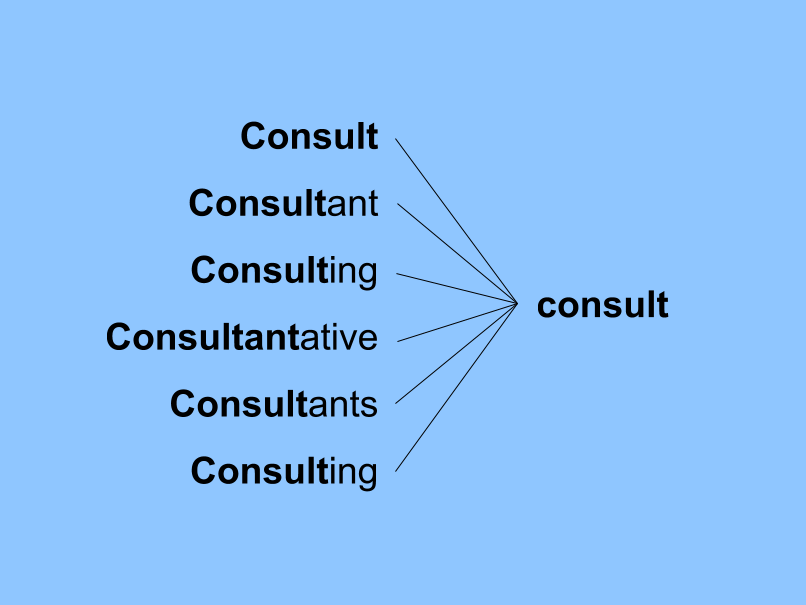

In [67]:
import nltk# this is the natural language tool kit, having various functions.
from nltk.stem.porter import PorterStemmer


In [68]:
ps = PorterStemmer()

In [69]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [70]:
stem('this is the natural language tool kit, having various functions')

'thi is the natur languag tool kit, have variou function'

In [71]:
# These are the root words of this sentence, now we can apply for the dataset.

In [72]:
movies['tags'] = movies['tags'].apply(stem)

In [73]:
movies['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jameshorn jamescameron'

In [74]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

Now we are good to find the similarity<br>
Note - here are not calculating the euclidean distance, we are using the cosine_similarity.

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
# here the cosine_similarity do, it brings all the inputs between ( 0 -1 ), where 1 defines that having the max_similarity, and where 0 defines min_or_zero_similarity
cos_similarity = cosine_similarity(vectors)
cos_similarity

array([[1.        , 0.08718573, 0.05812382, ..., 0.02423931, 0.02739983,
        0.        ],
       [0.08718573, 1.        , 0.0625    , ..., 0.0260643 , 0.        ,
        0.        ],
       [0.05812382, 0.0625    , 1.        , ..., 0.0260643 , 0.        ,
        0.        ],
       ...,
       [0.02423931, 0.0260643 , 0.0260643 , ..., 1.        , 0.07372098,
        0.04783649],
       [0.02739983, 0.        , 0.        , ..., 0.07372098, 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04783649, 0.05407381,
        1.        ]])

In [77]:
cos_similarity.shape

(4806, 4806)

In [78]:
def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = cos_similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    for i, movie_idx in enumerate(movies_list, start=1):
        movie_title = movies.iloc[movie_idx[0]].title
        print(f"{i}. {movie_title}")
        print('--')


In [79]:
recommend('Avatar')

1. Krull
--
2. Aliens
--
3. Titan A.E.
--
4. Independence Day
--
5. Aliens vs Predator: Requiem
--


In [80]:
recommend("Pirates of the Caribbean: At World's End")

1. Pirates of the Caribbean: Dead Man's Chest
--
2. Pirates of the Caribbean: On Stranger Tides
--
3. Pirates of the Caribbean: The Curse of the Black Pearl
--
4. 20,000 Leagues Under the Sea
--
5. Life of Pi
--


**Our model is working pretty well**

Future work - we can deploy this model into production ( MLOps )
+ we can create a website using heroku,flask, postman, etc.